https://github.com/ogrisel/sklearn_pycon2014/tree/master/notebooks
02_data_representation.ipynb

Know the internal data representation of scikit-learn.
Know how to use scikit-learn's dataset loaders to load example data.
Know how to turn image & text data into data matrices for learning.

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. This is a case where scipy.sparse matrices can be useful, in that they are much more memory-efficient than numpy arrays.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.keys() 
"""Information Inside Dataset. Use Variable Storing Our Data And Call These Keys For More Information On The Data"""

'Information Inside Dataset. Use Variable Storing Our Data And Call These Keys For More Information On The Data'

In [3]:
# print(iris.data)
# print(iris.target)
# print(iris.target_names)
# print(iris.DESCR) # Description Of Data
# print(iris.feature_names)

In [4]:
print(iris.data.shape)
print (iris.target.shape)

(150, 4)
(150,)


In [5]:
# iris.target.reshape(1,-1) # Convert To Multidimensional Array
# iris.target.reshape(-1,1) # Convert To Single Column

# Preview of Dimensionality Reduction: 
Dataset is 4-dimensional, but we visulize two of the dimensions at a time using a scatterplot.

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as color
import matplotlib.cm as cm

In [7]:
startcolor = '#800000'  # maroon
midcolor = '#00FFFF'    # aqua
endcolor = '#000000'    # white
cmap2 = color.LinearSegmentedColormap.from_list('name',[startcolor,midcolor,endcolor], N=256, gamma=1)
cm.register_cmap(name='name',cmap=cmap2)

'Creating an Iris Plot Where It Takes In Two Features Of The Iris Flowers. We Assign Each Flower Its Own Individual Color And We Create A Color Bar To Show What Each Color Represents:\n- The FuncFormatter Function Takes In A Variable Number Argument. We Use The Single * To Indicate That It Will Pass Will Pass Through A Variable Number Of Arguments, Where Variable Number Means We Do Not Yet Know How Many Arguments Will Be Passed. Later, We Will Pass On The Target Values 0,1,2 Which Will Point To Setosa, Versicolor, and Virginica, Respectively. To Use Our FuncFormatter Function We First Need To Create A Plot. This Plot Will Take In Two Arguments or Two Features Of The Iris Flowers, And c Will Be Set To iris.target, So Random Colors Will Be Assigned To Distinguish Each Of The 3 Flowers. We Then Use plt.colorbar To Pass Arguments Into Our Formatter. Ticks Is Set To 0,1, and 2Which are Associated With Setosa For 0, Versicolor For 1, and Virginica For 3. By Passing These 3 Values It Will Dis

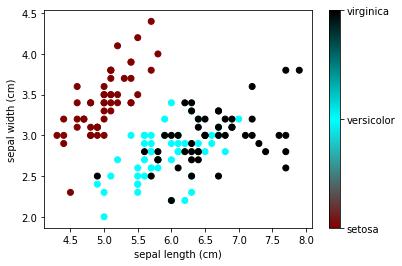

In [8]:
def iris_plot(feature_x, feature_y):
    # plt.FuncFormatter ~ Takes In The Target Names Of The Iris Data As Its Positional Argument
    formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[(i)])
    
    
    # Create A Mappable: Scatter Plot With Data From 2 Features And Apply FuncFormatter To The Plot
    plt.scatter(iris.data[:, feature_x], iris.data[:,feature_y], c = iris.target, cmap = cmap2)
    # Setting c To The Target Values Of The Iris Data Will Assign Each Of The 3 Targets With Its Own Individual Color
    # This Will Allow Us To Visualize The Clustering Of The 2 Of The Irises' Features
    
    plt.colorbar(ticks = [0, 1, 2], format = formatter)
    # Colorbar Takes A Positional Argument. We Set Format To Our Formatter Function To Display The Target's Names
    # Ticks Takes In Arguments Associated With The Target Values Of Our Data. These Ticks Points To The Names In Our
    # Formatter. Instead Of Having Values Displayed On Our Color Bar It Will Display As The Target Names
    # 0 - Setosa
    # 1 - Versicolor
    # 2 - Virginica
      
    plt.xlabel(iris.feature_names[feature_x])
    plt.ylabel(iris.feature_names[feature_y])
    
# Use 2 Features From Data For Our iris_plot Function (0-3)

iris_plot(0, 1) 

# 0 - sepal length (cm) 
# 1 - sepal width (cm)  
# 2 - petal length (cm) 
# 3 - petal width (cm)

"""Creating an Iris Plot Where It Takes In Two Features Of The Iris Flowers. We Assign Each Flower Its Own Individual \
Color And We Create A Color Bar To Show What Each Color Represents:
- The FuncFormatter Function Takes In A Variable Number Argument. We Use The Single * To \
Indicate That It Will Pass Will Pass Through A Variable Number Of Arguments, Where \
Variable Number Means We Do Not Yet Know How Many Arguments Will Be Passed. Later, We Will \
Pass On The Target Values 0,1,2 Which Will Point To Setosa, Versicolor, and Virginica, \
Respectively. To Use Our FuncFormatter Function We First Need To Create A Plot. This Plot \
Will Take In Two Arguments or Two Features Of The Iris Flowers, And c Will Be Set To \
iris.target, So Random Colors Will Be Assigned To Distinguish Each Of The 3 Flowers. \
We Then Use plt.colorbar To Pass Arguments Into Our Formatter. Ticks Is Set To 0,1, and 2\
Which are Associated With Setosa For 0, Versicolor For 1, and Virginica For 3. By Passing These \
3 Values It Will Display The Name Associated With The Value \
Note: By Removing A Value In Ticks, It Will Remove The Name In The Colorbar As It Is Missing
The Value Associated With That Value."""

# Three Types Of Available Data
- Packaged Data: these small datasets are packaged with the scikit-learn installation, and can be downloaded using the tools in sklearn.datasets.load_* 

- Downloadable Data: these larger datasets are available for download, and scikit-learn includes tools which streamline this process. These tools can be found in sklearn.datasets.fetch_*

- Generated Data: there are several datasets which are generated from models based on a random seed. These are available in the sklearn.datasets.make_*

# Digits Dataset

In [9]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import get_data_home
get_data_home()

'/Users/kerrylam/scikit_learn_data'

In [11]:
!ls $HOME/scikit_learn_data/

olivetti_py3.pkz


In [12]:
from sklearn.datasets import load_digits
digits_data = load_digits()

In [13]:
digits_data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [14]:
n_observations, n_features = digits_data.data.shape
print ("Number Of Observations:", n_observations, "\n" + "Number Of Features:", n_features)

"""This Splits The Shape Of Our Data To See How Many Observations There Are And How Many Features The Data \
Constists Of. Number Of Observations Represents Our Rows And 64 Features Means That Each Image Of A Number \
Is Represented By a 8x8 Pixel Image Or A 64-Length, Single Array"""

Number Of Observations: 1797 
Number Of Features: 64


'This Splits The Shape Of Our Data To See How Many Observations There Are And How Many Features The Data Constists Of. Number Of Observations Represents Our Rows And 64 Features Means That Each Image Of A Number Is Represented By a 8x8 Pixel Image Or A 64-Length, Single Array'

In [15]:
print (digits_data.data[0:10])
print (digits_data.target[0:10])

"""KL: Here, We Print Out The Data Of An Array Of An Image Of A Number Of Length 64. Meaning A Single Image Is \
Represented By A Single Array Comprised of 64 Values"""

[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]
 [  0.   0.   0.   4.  15.  12.   0.   0.   0.   0.   3.  16.  15.  14.
    0.   0.   0.   0.   8.  13.   8.  16.   0.   0.   0.   0.   1.   6.
   15.  11.   0.   0.   0.   1.   8.  13.  15.   1.   0.   0.   0.   9.
   16.  16.   5.   0.   0.   0.   0.   3.  13.  16.  16.  11.   5.   0.
    0.   0.   0.   3.  11.  16.   9.   0.]
 [  0. 

'KL: Here, We Print Out The Data Of An Array Of An Image Of A Number Of Length 64. Meaning A Single Image Is Represented By A Single Array Comprised of 64 Values'

In [16]:
print (digits_data.data.shape)
print (digits_data.images.shape)
# Checking To See If The Two Data Arrays Are Related
print (np.all(digits_data.images.reshape((1797, 64)) == digits_data.data))

"""Here, We Check To See If A Dataset With A 64-Length Array Is The Same Size As A 8x8 Pixel Image"""

(1797, 64)
(1797, 8, 8)
True


'Here, We Check To See If A Dataset With A 64-Length Array Is The Same Size As A 8x8 Pixel Image'

In [17]:
# Checking To See If Array Points To The Same Memory Block
print (digits_data.data.__array_interface__['data'])
print (digits_data.images.__array_interface__['data'])

(4536213504, False)
(4536213504, False)


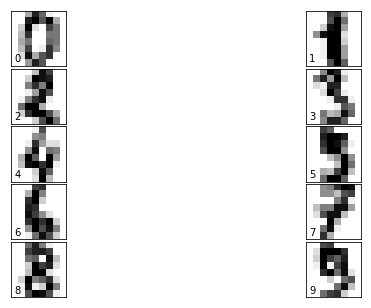

"This Section Involves Creating A Figure To Display Our Plot Of The Digit Dataset. The Parameters Of The figure Method Takes In Two Int Arguments To Determinize The Size Of The Figure. The For Loop Displays A Plot And add_subplot Takes Two Arguments To Display How We Want Our Dataframe To Look Like. The First Parameter Represents How Many Images We Would Like To Display And The Second Parameter cmap Takes In An Argument That Will Display The Amount Of Columns We Want. plt.cm.binary Prints The Image In Binary Format (e.g. Black/White), And Interpolation Fills In The Missing Key Frames. Leaving xticks And yticks With An Empty List Will Ensure The Images Show Up With Only The Digit From Our Target Data And Leave The Labels For The Axes Empty. axes.text Will Print Out The Numbers From Our Target Data By The Image. The First Two Parameters Takes In Two Numerical Arguments To Determine Where On The Images' Axes The Label Will Be Placed"

In [18]:
# Setting Up Figure For Digits Data
# Creating Image Size Of The Figure In Inches
figure = plt.figure(figsize=(8,8))  
figure.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plotting Each Image Of Picture: Each Image Is Size 10x10 pixels
for i in range(10):
    axes = figure.add_subplot(10,2, i + 1, xticks=[], yticks=[])
    axes.imshow(digits_data.images[i], cmap = plt.cm.binary, interpolation = 'nearest')
    
    # Label Image With Target Value
    axes.text(0,7, str(digits_data.target[i]))

plt.show()

"""This Section Involves Creating A Figure To Display Our Plot Of The Digit Dataset. The Parameters Of The \
figure Method Takes In Two Int Arguments To Determinize The Size Of The Figure. The For Loop Displays A Plot \
And add_subplot Takes Two Arguments To Display How We Want Our Dataframe To Look Like. The First Parameter Represents \
How Many Images We Would Like To Display And The Second Parameter cmap Takes In An Argument That Will Display \
The Amount Of Columns We Want. plt.cm.binary Prints The Image In Binary Format (e.g. Black/White), And Interpolation \
Fills In The Missing Key Frames. Leaving xticks And yticks With An Empty List Will Ensure The Images Show Up With \
Only The Digit From Our Target Data And Leave The Labels For The Axes Empty. axes.text Will Print Out The Numbers \
From Our Target Data By The Image. The First Two Parameters Takes In Two Numerical Arguments To Determine Where On \
The Images' Axes The Label Will Be Placed"""

Generated Data: S-Curve ~ Simple Non-Linear Dataset
- This example is typically used with a class of unsupervised learning methods known as manifold learning.

In [19]:
from sklearn.datasets import make_s_curve
# Separate Samples and Colors
data, colors = make_s_curve(n_samples=2000)
print(data.shape)
print(colors.shape)

(2000, 3)
(2000,)


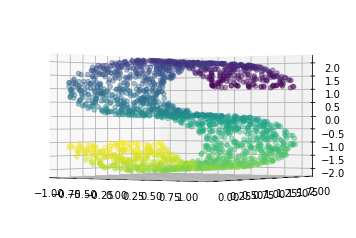

In [20]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Project A Plot Of The Data As 3-Dimensional
axes = plt.axes(projection = '3d')

# Plot Each Of The 3 Feature Colors On A Scatter Plot
axes.scatter(data[:, 0], data[:, 1], data[:, 2], c = colors, alpha = 0.4)

# view_init(Rotation Parameters)
axes.view_init(0, -55)

# Faces Data

In [21]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [22]:
faces = fetch_olivetti_faces()

In [23]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [24]:
n_observations, n_features = faces.data.shape
print ("Number Of Observations:", n_observations, \
       "\n" + "Number Of Features:", int(math.sqrt(n_features)),"x",int(math.sqrt(n_features)))

Number Of Observations: 400 
Number Of Features: 64 x 64


In [25]:
print (faces.data[1]) # Array Of One Of The 400 Images
print (faces.target[1])
# print (faces.images[1])

[ 0.45454547  0.47107437  0.51239669 ...,  0.15289256  0.15289256
  0.15289256]
0


In [26]:
print (faces.data.shape)
print (faces.images.shape)
# Checking To See If The Two Data Arrays Are Related
print (np.all(faces.images.reshape((400, 4096)) == faces.data))

(400, 4096)
(400, 64, 64)
True


In [27]:
# Checking To See If Array Points To The Same Memory Block
print (faces.data.__array_interface__['data'])
print (faces.images.__array_interface__['data'])

"""Why Does This False Mean?"""

(4685193216, False)
(4691746816, False)


'Why Does This False Mean?'

'What Is i + 1. How Do We Print Out Multiple Images Of Our Choosing?'

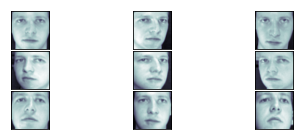

In [28]:
# Plot Single Image At A Time
# Setting Up Figure For Faces Data
# Creating Image Size Of The Figure In Inches
figure = plt.figure(figsize=(5,5))  
figure.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plotting Images From Dataset: Each Image Is Size 10x10 pixels
for i in range(9):
    axes = figure.add_subplot(9, 3, i + 1, xticks=[], yticks=[])
    axes.imshow(faces.images[i], cmap = plt.cm.bone, interpolation = 'quadric')

#add_subplot(n_images to display, n_columns to display images )

"""What Is i + 1. How Do We Print Out Multiple Images Of Our Choosing?"""